# Assignment 2
### Understanding Uncertainty
### Due 9/12

In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking. 
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

Part 1

I’d define the most profitable item as the SKU that produces the largest total gross profit over the period because if your goal is to maximize money made, you pick the item that contributes the largest absolute dollars, not just a high profit percentage.

Part 2

In [113]:
df = pd.read_csv("data/iowa.csv")
df.head()



,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


<Axes: xlabel='Bottles Sold', ylabel='Item Description'>

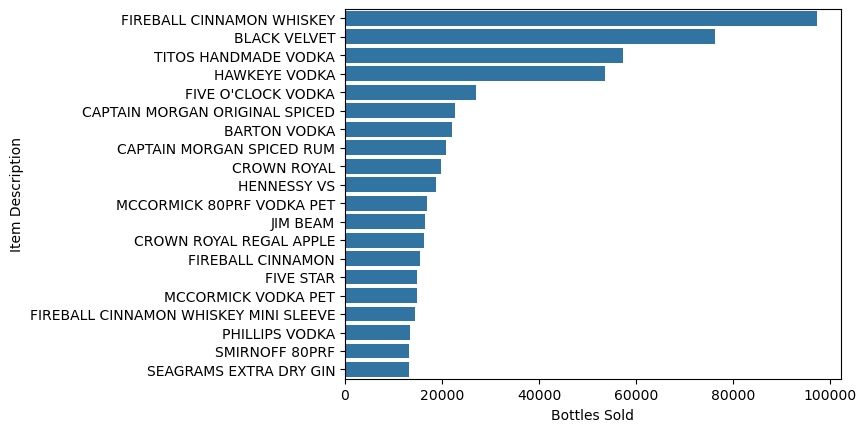

In [114]:
bottles = (df.loc[:,['Bottles Sold','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Bottles Sold',ascending=False) )

top_bottles = bottles[:20]
sns.barplot(top_bottles['Bottles Sold'], orient = 'h')

<Axes: xlabel='Highest Total Profit', ylabel='Item Description'>

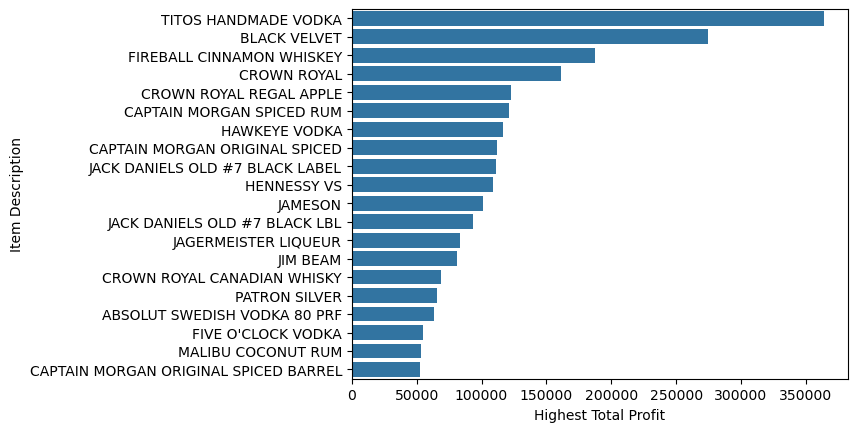

In [115]:
df['Highest Total Profit'] = (df['State Bottle Retail']- df['State Bottle Cost']) * df['Bottles Sold']

profit = (df.loc[:,['Highest Total Profit','Item Description']]
         .groupby('Item Description')
         .sum()
         .sort_values(by='Highest Total Profit',ascending=False) )

top_profit = profit[:20]
sns.barplot(top_profit['Highest Total Profit'], orient = 'h')

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [116]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

Part 1

In [117]:
print(x-y)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

When you try to subtract the two vectors, you get a Value Error. x is length 3 and y is length 2, and NumPy only broadcasts when sizes match. 

Part 2

In [ ]:
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

You get a table of every x minus every y, with rows for x values and columns for y values.

Part 3

In [ ]:
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

You get the same differences, but the table is flipped rows for y values and columns for x values.

Part 4

In [ ]:
result_loop = np.zeros((x.shape[0],y.shape[0]))

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        result_loop[i,j] = x[i]-y[j]       
print("\nDouble for-loop replication result for x.reshape(-1,1)-y.reshape(1,-1):")
print(result_loop)


Double for-loop replication result for x.reshape(-1,1)-y.reshape(1,-1):
[[-1. -4.]
 [ 1. -2.]
 [ 3.  0.]]


In [ ]:
result_loop = np.zeros((x.shape[0],y.shape[0]))

for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        result_loop[i,j] = x[i]-y[j]       
print("\nDouble for-loop replication result for x.reshape(1,-1)-y.reshape(-1,1):")
print(result_loop.T)


Double for-loop replication result for x.reshape(1,-1)-y.reshape(-1,1):
[[-1.  1.  3.]
 [-4. -2.  0.]]


Part 5

x.reshape(1, -1) turns x into a 2-D row with shape (1, n), and x.reshape(-1, 1) turns it into a 2-D column with shape (n, 1). The -1 just tells NumPy to infer n. The values don’t change, only the layout. Because you changed the numpy arrays to the same size so now they can be subtracted

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

[Text(0.5, 1.0, 'Indicator function for x=3')]

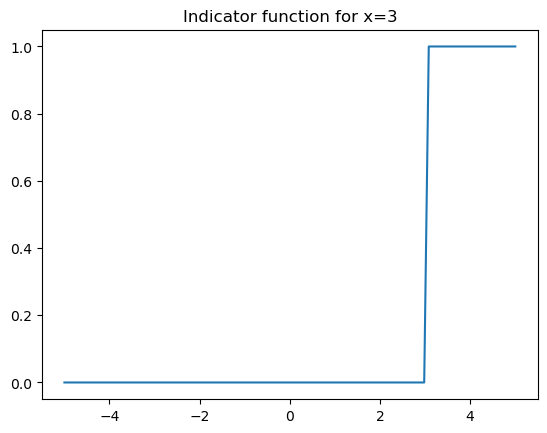

In [ ]:
grid = np.linspace(-5,5,100)

def ind_ls(x,grid):
    return (x <= grid).astype(int)

sns.lineplot(x=grid, y=ind_ls(3,grid)).set(title="Indicator function for x=3")

For any $z$, exactly one of the events $\{x\le z\}$ or $\{x>z\}$ is true (they’re complements).
Indicators satisfy $\mathbf{1}_A+\mathbf{1}_{A^c}=1$, so subtracting from $1$ flips true/false.
At $z=x$, $\mathbf{1}\{x\le z\}=1$ and $\mathbf{1}\{x>z\}=0$, so the identity still holds.


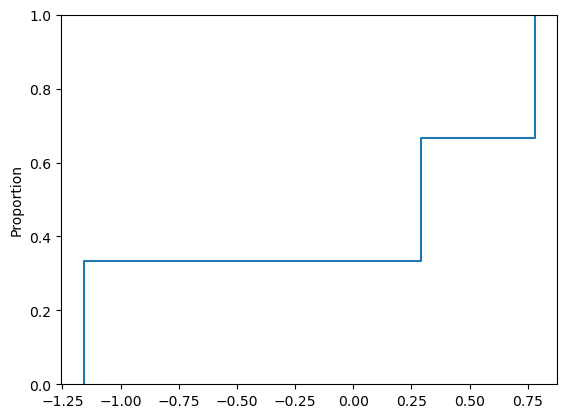

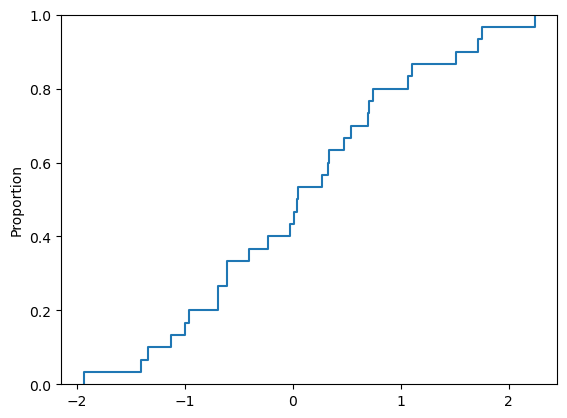

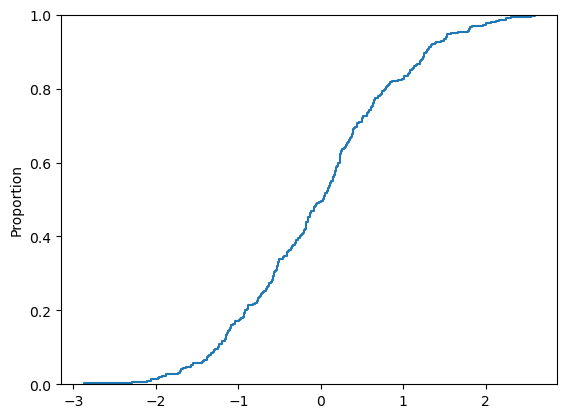

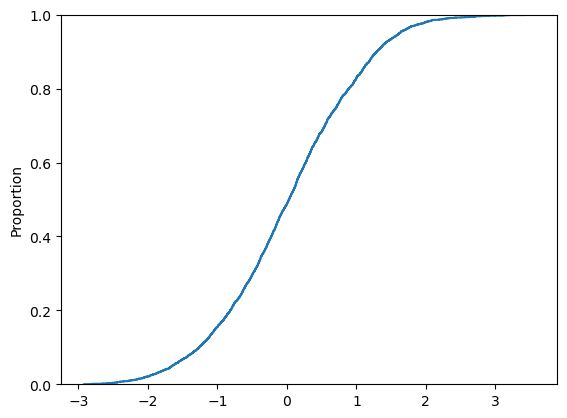

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:
    sns.ecdfplot(x=X)
    plt.show()


As you add more data, the empirical cdf looks less jagged and more stable. Each step is only 1/N tall, so more points mean lots of small steps instead of a few big ones. The curve lines up better with the real distribution because the random wiggle shrinks 1/sqrt(N). Any single odd point matters less too, since one point only moves the curve by 1/N. Bottom line, more data gives a steadier staircase that tracks the true pattern better.

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [ ]:
def f(x,y): 
    lower_proportion = x[0:y*len(x)]
    higher_proportion = x[y*len(x):]

    return lower_proportion, higher_proportion

In [ ]:
def IQR(array):
    lower_quantile = array[0:25*len(array)]
    highter_quantile = array[75*len(array):]

    return lower_quantile, highter_quantile



In [ ]:
def IQR_Whiskers(x):
    Q1 = Quantile(x,0.25)
    Q3 = Quantile(x,0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    higher_whisker = Q3 + 1.5 * IQR

    return lower_whisker, higher_whisker

In [ ]:
def five_Num_Summary(x):
    minimum = x.min()
    Q1 = Quantile(x,0.25)
    median = x.median()
    Q3 = Quantile(x,0.75)
    maximum = x.max()
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    higher_whisker = Q3 + 1.5 * IQR

    return minimum, Q1, median, Q3, maximum, lower_whisker, higher_whisker

In [ ]:
def Outliers(x):
    Outliers_low = x[x < IQR_Whiskers(x)['Lower_Whisker']]
    Outliers_high = x[x > IQR_Whiskers(x)['Higher_Whisker']]

    return Outliers_low, Outliers_high  

In [ ]:
metabric = pd.read_csv("data/metabric.csv")
metabric.head()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Chemotherapy,Hormone Therapy,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Overall Survival (Months),Overall Survival Status,Radio Therapy,TMB (nonsynonymous),Tumor Size,Tumor Stage
0,43.19,BREAST CONSERVING,Breast Cancer,NO,YES,0.0,2.0,4.020,84.633333,0:LIVING,YES,2.615035,10.0,1.0
1,48.87,MASTECTOMY,Breast Cancer,YES,YES,1.0,2.0,4.030,163.700000,1:DECEASED,NO,2.615035,15.0,2.0
2,47.68,MASTECTOMY,Breast Cancer,YES,YES,3.0,1.0,4.050,164.933333,0:LIVING,YES,1.307518,25.0,2.0
3,76.97,MASTECTOMY,Breast Cancer,YES,YES,8.0,2.0,6.080,41.366667,1:DECEASED,YES,2.615035,40.0,2.0
4,78.77,MASTECTOMY,Breast Cancer,NO,YES,0.0,4.0,4.062,7.800000,1:DECEASED,YES,5.230071,31.0,4.0


In [ ]:
t = metabric['Age at Diagnosis']

In [ ]:
five_Num_Summary(t)

(21.93,
 np.float64(51.045),
 61.14,
 np.float64(69.815),
 96.29,
 np.float64(22.890000000000008),
 np.float64(97.97))

<Axes: ylabel='Age at Diagnosis'>

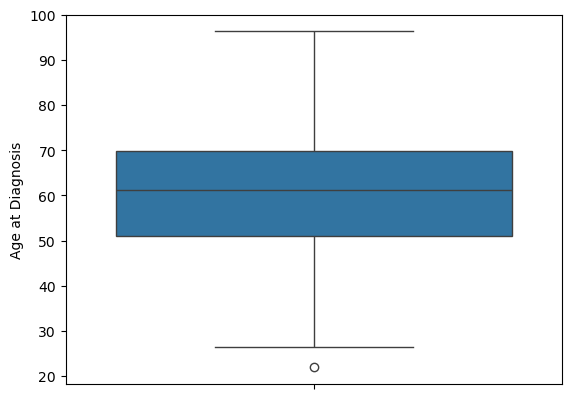

In [ ]:
sns.boxplot(t)

In [ ]:
t.describe()

count    1343.000000
mean       60.598079
std        12.966330
min        21.930000
25%        51.045000
50%        61.140000
75%        69.815000
max        96.290000
Name: Age at Diagnosis, dtype: float64

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?